In [56]:
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [57]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [58]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [59]:
print(test_images[1].shape)

(28, 28)


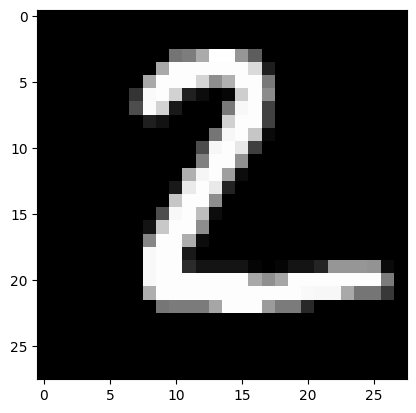

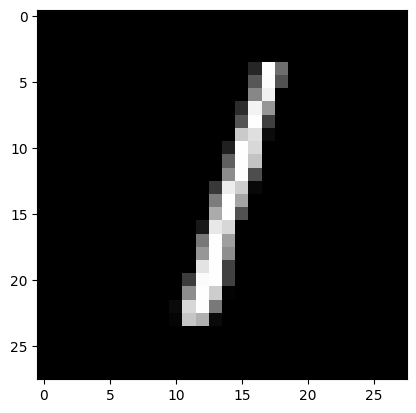

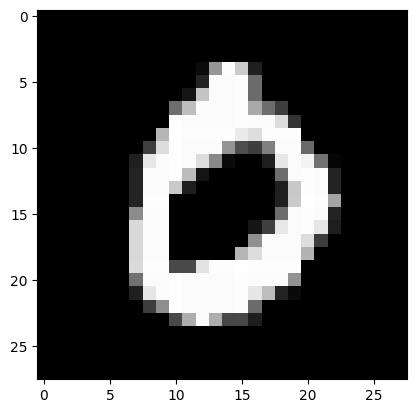

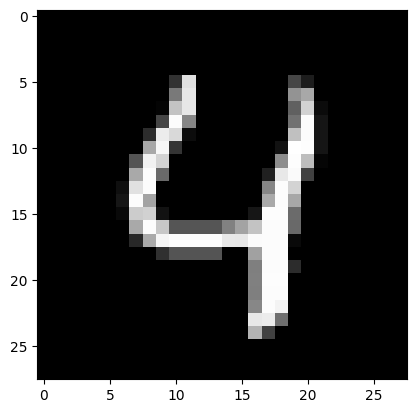

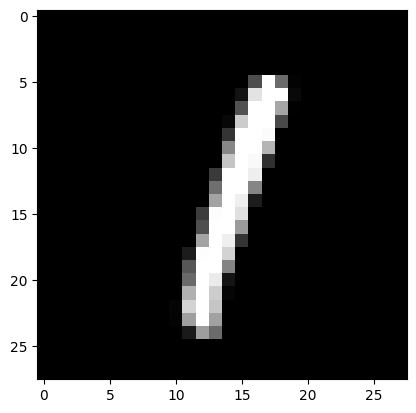

In [60]:
for i in range(1, 6):
    plt.figure()
    plt.imshow(test_images[i], cmap='grey')

In [61]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [62]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [63]:
reshaped_images_train = train_images.reshape(60000, 28 * 28)
reshaped_images_train = reshaped_images_train.astype(np.float32)
reshaped_images_train /= 255.0

In [65]:
reshaped_images_test = test_images.reshape(10000, 28 * 28)
reshaped_images_test = reshaped_images_test.astype(np.float32)
reshaped_images_test /= 255.0

In [66]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [67]:
network.fit(reshaped_images_train, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8761 - loss: 0.4365
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9663 - loss: 0.1169
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9790 - loss: 0.0699
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0494
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9885 - loss: 0.0369


In [69]:
test_loss, test_acc = network.evaluate(reshaped_images_test, test_labels)
 
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - accuracy: 0.9791 - loss: 0.0712
test_acc: 0.9815000295639038
